#  **Readers' Preferences - Book Analysis**

***

### data resources:
- StoryGraph (book-tracking platform)
- Google Books API

## **Data Cleaning and Preprocessing**

### Importing Needed packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare
import seaborn as sns
from prettytable import PrettyTable
from itertools import combinations
from collections import defaultdict

### Downloading Data and reading it in

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/books_data_both - merge-csv.com__65e8a8e01c8a3.csv")

### Our data

exploring featurs we have and the data type for each


In [ ]:
print(df.dtypes)

Title                object
Author               object
Number of Pages     float64
Format               object
Language             object
Publisher            object
Publication Date     object
Categories           object
dtype: object


taking a look at the dataset

In [ ]:
df.head()


,Title,Author,Number of Pages,Format,Language,Publisher,Publication Date,Categories
0,1984,George Orwell,304.0,Hardcover,English,Houghton Mifflin,4/4/2017,"['fiction', 'classics', 'dystopian', 'literary']"
1,The Handmaid's Tale - The Handmaid's Tale #1,Margaret Atwood,400.0,Paperback,English,Seal Books,8/10/1998,"['fiction', 'classics', 'dystopian', 'literary']"
2,Animal Farm,George Orwell,152.0,Paperback,English,Signet Books,4/6/2004,"['fiction', 'classics', 'dystopian']"
3,The Color Purple - The Color Purple Collection #1,Alice Walker,271.0,Paperback,English,Penguin Books,12/10/2019,"['fiction', 'classics', 'historical', 'lgbtqia..."
4,Beloved - Beloved Trilogy #1,Toni Morrison,329.0,Paperback,English,Vintage,6/8/2004,"['fiction', 'classics', 'historical', 'literar..."


### Data Preprocessing
***



#### Cleaning rows with null values


- discovering rows with null values

In [ ]:
df.isnull()

,Title,Author,Number of Pages,Format,Language,Publisher,Publication Date,Categories
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
623,False,False,False,False,False,False,False,False
624,False,False,False,False,False,False,False,False
625,False,False,False,False,False,False,False,False
626,False,False,False,False,False,False,False,False


- Counting the number of null values in each column in the  DataFrame

In [ ]:

null_values = df.isnull().sum()
print(null_values)

Title                0
Author               0
Number of Pages      7
Format               0
Language             0
Publisher            0
Publication Date     9
Categories          14
dtype: int64


- Removing rows with null values and displaying the new data frame

In [ ]:

df_clean = df.dropna()
print(df_clean)

                                                 Title  \
0                                                 1984   
1         The Handmaid's Tale - The Handmaid's Tale #1   
2                                          Animal Farm   
3    The Color Purple - The Color Purple Collection #1   
4                         Beloved - Beloved Trilogy #1   
..                                                 ...   
623                                  She Gets the Girl   
624                                     The Tenth Girl   
625                      Ryan Higa's How to Write Good   
626                                This Book Loves You   
627                                       You (Export)   

                                 Author  Number of Pages     Format Language  \
0                         George Orwell            304.0  Hardcover  English   
1                       Margaret Atwood            400.0  Paperback  English   
2                         George Orwell            152.0  Paper

- Removing rows containing 'Not specified' values

In [ ]:

df_clean = df_clean[~df_clean.apply(lambda row: (row == "Not specified").any(), axis=1)]
if len(df_clean) == 0:
    print("All rows containing 'Not specified' values, and it have been removed.")
else:
    print("Rows containing 'Not specified' values have been removed.")

Rows containing 'Not specified' values have been removed.


- Removing rows containing page numbers that is equal to zero

In [ ]:

df_clean = df_clean[~df_clean.apply(lambda row: (row['Number of Pages'] == 0) or (row['Number of Pages'] == 0.0), axis=1)]

if len(df_clean) == 0:
    print("All rows containing 'Number of Pages' values equal to 0, and it have been removed.")
else:
    print("Rows containing 'Number of Pages' values equal to 0 have been removed.")

Rows containing 'Number of Pages' values equal to 0 have been removed.


- viewing the data frame after cleaning

In [ ]:
print(df_clean)

                                                 Title  \
0                                                 1984   
1         The Handmaid's Tale - The Handmaid's Tale #1   
2                                          Animal Farm   
3    The Color Purple - The Color Purple Collection #1   
4                         Beloved - Beloved Trilogy #1   
..                                                 ...   
622                                  What Kind of Girl   
623                                  She Gets the Girl   
624                                     The Tenth Girl   
625                      Ryan Higa's How to Write Good   
626                                This Book Loves You   

                                 Author  Number of Pages     Format Language  \
0                         George Orwell            304.0  Hardcover  English   
1                       Margaret Atwood            400.0  Paperback  English   
2                         George Orwell            152.0  Paper

#### Enahancing the readabiliy of categories and unifieng it



- removing brackets and quotes and splitting catagories by comma

In [ ]:
def clean_category(category):
    # Remove brackets and quotes and split by comma
    categories = category.replace("[", "").replace("]", "").replace("'", "").split(', ')
    # Join the categories back with comma separator
    return ', '.join(categories)

# Apply the function to the 'category' column
df_clean['Categories'] = df_clean['Categories'].apply(clean_category)

# Print the cleaned DataFrame
print(df_clean)

                                                 Title  \
0                                                 1984   
1         The Handmaid's Tale - The Handmaid's Tale #1   
2                                          Animal Farm   
3    The Color Purple - The Color Purple Collection #1   
4                         Beloved - Beloved Trilogy #1   
..                                                 ...   
622                                  What Kind of Girl   
623                                  She Gets the Girl   
624                                     The Tenth Girl   
625                      Ryan Higa's How to Write Good   
626                                This Book Loves You   

                                 Author  Number of Pages     Format Language  \
0                         George Orwell            304.0  Hardcover  English   
1                       Margaret Atwood            400.0  Paperback  English   
2                         George Orwell            152.0  Paper

- Saperating categories with comma when needed

In [ ]:
# Splitting the "Categories" column into "young adult" and "fiction/nonfiction"
df_clean['Categories'] = df_clean['Categories'].str.replace("young adult ", ", young adult, ", regex=False)

print(df_clean)

                                                 Title  \
0                                                 1984   
1         The Handmaid's Tale - The Handmaid's Tale #1   
2                                          Animal Farm   
3    The Color Purple - The Color Purple Collection #1   
4                         Beloved - Beloved Trilogy #1   
..                                                 ...   
622                                  What Kind of Girl   
623                                  She Gets the Girl   
624                                     The Tenth Girl   
625                      Ryan Higa's How to Write Good   
626                                This Book Loves You   

                                 Author  Number of Pages Language  \
0                         George Orwell            304.0  English   
1                       Margaret Atwood            400.0  English   
2                         George Orwell            152.0  English   
3                          

- checking if the space is removed, and the comma was added successfully

In [ ]:
young_adult_books = df_clean[df_clean['Categories'].str.contains('young adult', case=False)]

# Print the filtered DataFrame
young_adult_books.head()

,Title,Author,Number of Pages,Language,Publisher,Publication Date,Categories,Month,publication year
25,Check & Mate,Ali Hazelwood,352.0,English,G.P. Putnam's Sons Books for Young Readers,2023-11,"fiction, contemporary, lgbtqia+, romance, youn...",11,2023
41,I Hope This Doesn't Find You,Ann Liang,336.0,English,Scholastic Press,2024-02,"fiction, contemporary, romance, young adult",2,2024
42,Better Than the Movies - Better Than the Movie...,Lynn Painter,356.0,English,Simon & Schuster Books for Young Readers,2021-05,"fiction, contemporary, romance, young adult",5,2021
43,If He Had Been with Me - If He Had Been with M...,Laura Nowlin,391.0,English,Sourcebooks Fire,2013-04,"fiction, contemporary, romance, young adult",4,2013
82,Shatter Me - Shatter Me #1,Tahereh Mafi,338.0,English,Harper,2011-11,"fiction, dystopian, romance, young adult",11,2011


- using lower case for all catagories

In [ ]:
df_clean['Categories'] = df_clean['Categories'].str.lower()

print(df_clean)

                                                 Title  \
0                                                 1984   
1         The Handmaid's Tale - The Handmaid's Tale #1   
2                                          Animal Farm   
3    The Color Purple - The Color Purple Collection #1   
4                         Beloved - Beloved Trilogy #1   
..                                                 ...   
622                                  What Kind of Girl   
623                                  She Gets the Girl   
624                                     The Tenth Girl   
625                      Ryan Higa's How to Write Good   
626                                This Book Loves You   

                                 Author  Number of Pages     Format Language  \
0                         George Orwell            304.0  Hardcover  English   
1                       Margaret Atwood            400.0  Paperback  English   
2                         George Orwell            152.0  Paper

- unifying names of the categories that are named in different ways in the dataset

In [ ]:
def unify_categories(category_str):
    # Split the category string into a list of categories
    categories = category_str.split(', ')

    new_categories = []
    for category in categories:
        category = category.lower()
        category = category.replace('juvenile fiction', 'fiction, middle grade')
        category = category.replace('juvenile nonfiction', 'nonfiction, middle grade')
        category = category.replace('history', 'historical')
        new_categories.append(category)

    # Join the modified categories back into a string, if that's the desired format
    return ', '.join(new_categories)

# Apply the transformation to each row's categories
df_clean['Categories'] = df_clean['Categories'].apply(unify_categories)

print(df_clean)


                                                 Title  \
0                                                 1984   
1         The Handmaid's Tale - The Handmaid's Tale #1   
2                                          Animal Farm   
3    The Color Purple - The Color Purple Collection #1   
4                         Beloved - Beloved Trilogy #1   
..                                                 ...   
622                                  What Kind of Girl   
623                                  She Gets the Girl   
624                                     The Tenth Girl   
625                      Ryan Higa's How to Write Good   
626                                This Book Loves You   

                                 Author  Number of Pages     Format Language  \
0                         George Orwell            304.0  Hardcover  English   
1                       Margaret Atwood            400.0  Paperback  English   
2                         George Orwell            152.0  Paper

#### Enhancing the readability of the language column

In [ ]:
# Replace 'en' with 'English' in the 'language' column
df_clean['Language'] = df_clean['Language'].replace('en', 'English')

# Print the DataFrame to verify changes
print(df_clean)

                                                 Title  \
0                                                 1984   
1         The Handmaid's Tale - The Handmaid's Tale #1   
2                                          Animal Farm   
3    The Color Purple - The Color Purple Collection #1   
4                         Beloved - Beloved Trilogy #1   
..                                                 ...   
622                                  What Kind of Girl   
623                                  She Gets the Girl   
624                                     The Tenth Girl   
625                      Ryan Higa's How to Write Good   
626                                This Book Loves You   

                                 Author  Number of Pages     Format Language  \
0                         George Orwell            304.0  Hardcover  English   
1                       Margaret Atwood            400.0  Paperback  English   
2                         George Orwell            152.0  Paper

#### Converting 'Publication Date' feature to datetime type

In [ ]:
df_clean['Publication Date'] = pd.to_datetime(df_clean['Publication Date'])

# Extract month from 'Publication Date'
df_clean['Month'] = df_clean['Publication Date'].dt.month

# convert the "Month" column to integer type
df_clean['Month'] = df_clean['Month'].astype(int)

# Extract year from 'Publication Date'
df_clean['publication year'] = df_clean['Publication Date'].dt.year

# convert the "Publication Year" column to integer type
df_clean['publication year'] = df_clean['publication year'].astype(int)



# Format 'Publication Date' to display only year and month
df_clean['Publication Date'] = df_clean['Publication Date'].dt.strftime('%Y-%m')

# Print the DataFrame
print(df_clean)

                                                 Title  \
0                                                 1984   
1         The Handmaid's Tale - The Handmaid's Tale #1   
2                                          Animal Farm   
3    The Color Purple - The Color Purple Collection #1   
4                         Beloved - Beloved Trilogy #1   
..                                                 ...   
622                                  What Kind of Girl   
623                                  She Gets the Girl   
624                                     The Tenth Girl   
625                      Ryan Higa's How to Write Good   
626                                This Book Loves You   

                                 Author  Number of Pages     Format Language  \
0                         George Orwell            304.0  Hardcover  English   
1                       Margaret Atwood            400.0  Paperback  English   
2                         George Orwell            152.0  Paper

#### Deleting columns that are irrelative

In [ ]:
# Deleting the "Format" column
df_clean.drop(columns=['Format'], inplace=True)

# Print the DataFrame
print(df_clean)

                                                 Title  \
0                                                 1984   
1         The Handmaid's Tale - The Handmaid's Tale #1   
2                                          Animal Farm   
3    The Color Purple - The Color Purple Collection #1   
4                         Beloved - Beloved Trilogy #1   
..                                                 ...   
622                                  What Kind of Girl   
623                                  She Gets the Girl   
624                                     The Tenth Girl   
625                      Ryan Higa's How to Write Good   
626                                This Book Loves You   

                                 Author  Number of Pages Language  \
0                         George Orwell            304.0  English   
1                       Margaret Atwood            400.0  English   
2                         George Orwell            152.0  English   
3                          

#### The dataframe after cleaning

In [ ]:
df_clean.head()

,Title,Author,Number of Pages,Language,Publisher,Publication Date,Categories,Month,publication year
0,1984,George Orwell,304.0,English,Houghton Mifflin,2017-04,"fiction, classics, dystopian, literary",4,2017
1,The Handmaid's Tale - The Handmaid's Tale #1,Margaret Atwood,400.0,English,Seal Books,1998-08,"fiction, classics, dystopian, literary",8,1998
2,Animal Farm,George Orwell,152.0,English,Signet Books,2004-04,"fiction, classics, dystopian",4,2004
3,The Color Purple - The Color Purple Collection #1,Alice Walker,271.0,English,Penguin Books,2019-12,"fiction, classics, historical, lgbtqia+, literary",12,2019
4,Beloved - Beloved Trilogy #1,Toni Morrison,329.0,English,Vintage,2004-06,"fiction, classics, historical, literary, magic...",6,2004


In [ ]:
df_clean.to_csv("/content/drive/MyDrive/books_data_cleaned.csv", index=False)


***
## **Exploratory data analysis (EDA)**



#### Analysis for testing the diversity and balance of data





- The diversity of the year

In [ ]:
# Calculate the proportion of books published each year
year_counts = df_clean['publication year'].value_counts(normalize=True)

# Calculate the Gini-Simpson Index
gini_simpson_index = 1 - sum(year_counts**2)

gini_simpson_index

0.9458327548706558

- The diversity of the language

In [ ]:
# Calculate entropy on year proportions
entropy = -sum(year_counts * np.log2(year_counts))

# Calculate observed frequencies of each language
language_counts = df_clean['Language'].value_counts()

# Assuming an equal distribution is expected, each language would ideally have the same number of books
expected = np.full_like(language_counts, fill_value=language_counts.mean())

# Perform the Chi-Squared Test
chi_square_stat, p_value = chisquare(language_counts, f_exp=expected)

entropy, (chi_square_stat, p_value) # the p_value for the Language was (0.0, nan) beacuse it only has one value "English"

(4.4715690278348825, (0.0, nan))

- The frequancy of each value in author, genre, publisher, and publication year

In [ ]:
# Calculate potential biases
author_bias = df_clean['Author'].value_counts()
genre_bias = df_clean['Categories'].apply(pd.Series).stack().value_counts()
publisher_bias = df_clean['Publisher'].value_counts()
language_bias = df_clean['Language'].value_counts()
publication_year_bias = df_clean['publication year'].value_counts()

# Evaluation of biases and their sources
biases_evaluation = {
    "Author Bias": author_bias,
    "Genre Bias": genre_bias,
    "Publisher Bias": publisher_bias,
    "Language Bias": language_bias,
    "Publication Year Bias": publication_year_bias
}
print(biases_evaluation)


{'Author Bias': Author
Sarah J. Maas        16
Emily Henry           6
Ali Hazelwood         5
Suzanne Collins       4
Freida McFadden       4
                     ..
Imad A. Moosa         1
Bill McKendry         1
Andrew Hillsdon       1
Lisa Marie Basile     1
PewDiePie             1
Name: count, Length: 502, dtype: int64, 'Genre Bias': fiction                                84
fiction, middle grade                  52
fiction, contemporary, romance         30
nonfiction, middle grade               20
fiction, fantasy, romance              18
                                       ..
nonfiction, biography, historical       1
fiction, fantasy, lgbtqia+, mystery     1
fiction, science fiction                1
fiction, romance                        1
fiction, literary, thriller             1
Name: count, Length: 150, dtype: int64, 'Publisher Bias': Publisher
Penguin                      27
Simon and Schuster           24
Xlibris Corporation          11
Bloomsbury Publishing        11
B

#### Descriptive exploration on the data.

In [ ]:
df_clean.describe()

,Number of Pages,Month,publication year
count,588.000000,588.000000,588.000000
mean,318.294218,5.945578,2015.338435
std,184.378195,3.385574,10.204690
min,8.000000,1.000000,1897.000000
25%,198.000000,3.000000,2012.000000
50%,320.000000,5.000000,2017.000000
75%,400.000000,9.000000,2021.000000
max,1618.000000,12.000000,2024.000000


- descriptive exploration including nominal data

In [ ]:
df_clean.describe(include=['O'])

,Title,Author,Language,Publisher,Publication Date,Categories
count,588,588,588,588,588,588
unique,574,502,1,322,233,150
top,Seven,Sarah J. Maas,English,Penguin,2024-02,fiction
freq,5,16,588,27,16,84


#### Studying correlation of numerical features

In [ ]:
df_clean.corr()

ValueError: could not convert string to float: "The Handmaid's Tale - The Handmaid's Tale #1"

- Visualizing correlation

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_clean.corr(), annot=True)

#### Most occuring values in the featuers

- The auther with the biggest number of books

In [ ]:
occu=df_clean['Author'].value_counts()
most_common_author = occu.idxmax()
print(most_common_author)

most_common_count = occu.max()
print(most_common_count)

Visualization for writer how has 2 or more books

In [ ]:
occu2 = occu[occu > 2].sort_values()
plt.figure(figsize=(6,5))
occu2.plot(kind='bar')
plt.show()

- Visualizaion for number of books published each year

In [ ]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x=df_clean['publication year'].value_counts().index,
                 y=df_clean['publication year'].value_counts().values,
                 alpha=0.8)
plt.title("Publication Year Distribution")
plt.xlabel('Publication Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

- The category that occured the most

In [ ]:
duplicate_cat = df_clean['Categories'].describe()['top']
duplicate_cat

In [ ]:
cat_is_the_duplicate = df_clean['Categories'] == duplicate_cat
type(cat_is_the_duplicate) # it is a Series of Trues and Falses

Number of occurace for the most frequent category

In [ ]:
print(cat_is_the_duplicate)
sum(cat_is_the_duplicate)

 Dataframe with only rows with the most frequent category

In [ ]:
filtered_dataframe = df_clean[cat_is_the_duplicate]
filtered_dataframe

In [ ]:
group2 = df_clean[["publication year", "Categories"]].groupby('Categories').median()
group2

#### Creating a set that hods each unique category with it's count and the corresponding publication year, Number of Pages

In [ ]:
unique_categories = set()
category_counts = defaultdict(int)
category_years = defaultdict(list)
category_pages = defaultdict(list)

for _, row in df_clean.iterrows():
    if pd.notnull(row['Categories']):
        categories = row['Categories'].split(", ")
        for category in categories:
            unique_categories.add(category)
            category_counts[category] += 1
            category_years[category].append(row['publication year'])
            category_pages[category].append(row['Number of Pages'])

- print each category with the corresponding count, publication year, Number of Pages

In [ ]:
def print_category_counts(category_counts):
    table = PrettyTable(["Category", "Count"])
    for category, count in category_counts.items():
        table.add_row([category, count])
    print("Category Counts:\n", table)

def print_years_for_each_category(category_years):
    table = PrettyTable(["Category", "Years"])
    for category, years in category_years.items():
        years_str = ', '.join(map(str, sorted(set(years))))
        table.add_row([category, years_str])
    print("\nYears for Each Category:\n", table)

def print_pages_for_each_category(category_pages):
    table = PrettyTable(["Category", "Number of Pages (sample)"])
    for category, pages in category_pages.items():
        pages_str = ', '.join(map(str, pages[:5])) + ('...' if len(pages) > 5 else '')
        table.add_row([category, pages_str])
    print("\nNumber of Pages for Each Category (sample):\n", table)

print_category_counts(category_counts)

Category Counts:
 +-------------------------------+-------+
|            Category           | Count |
+-------------------------------+-------+
|            fiction            |  370  |
|            classics           |   13  |
|           dystopian           |   14  |
|            literary           |   52  |
|           historical          |   41  |
|            lgbtqia+           |   31  |
|        magical realism        |   5   |
|      speculative fiction      |   4   |
|             horror            |   5   |
|        science fiction        |   13  |
|            romance            |   90  |
|          contemporary         |   63  |
|             crime             |   4   |
|            thriller           |   25  |
|            mystery            |   19  |
|            fantasy            |   90  |
|          young adult          |   50  |
|             sports            |   3   |
|            erotica            |   2   |
|          middle grade         |   77  |
|         graphi

####  Categories that occured the most

In [ ]:
# Filter categories with frequency greater than 20
category_counts_filtered = {category: count for category, count in category_counts.items() if count > 20}

plt.figure(figsize=(8, 6))
plt.bar(category_counts_filtered.keys(), category_counts_filtered.values(), color='skyblue')
plt.title('Frequency of Categories with Frequency > 20')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Average number of pages for each unique category

In [ ]:
average_pages_per_category = {category: sum(pages) / len(pages) for category, pages in category_pages.items() if pages}

table = PrettyTable(["Category", "Average Number of Pages"])
for category, avg_pages in sorted(average_pages_per_category.items(), key=lambda x: x[1], reverse=True):
    table.add_row([category, f"{avg_pages:.2f}"])
print("\nAverage Number of Pages per Category:\n", table)

# Execute the functions to print the tables
print_category_counts(category_counts)
print_years_for_each_category(category_years)
print_pages_for_each_category(category_pages)

#### Each author with the years in which they published a book

In [ ]:
author_years = {}  # Initialize dictionary to store author and publication year data

# Iterate through each row in the DataFrame
for index, row in df_clean.iterrows():
    author = row['Author']
    year = int(row['publication year'])  # Convert to int if needed

    # Check if the author already exists in the dictionary
    if author in author_years:
        # If the author exists, append the year to their array
        author_years[author].append(year)
    else:
        # If the author doesn't exist, create a new array with the year
        author_years[author] = [year]

# Print the dictionary
print(author_years)

- Visualizing Publishers with most publications in recent Years

In [ ]:
# Filter DataFrame for recent years (e.g., last 5 years)
recent_years = df_clean[df_clean['publication year'] >= 2020]

# Count the occurrences of each publisher in recent years
publisher_counts = recent_years['Publisher'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
publisher_counts.head(10).plot(kind='bar', alpha=0.7)
plt.title("Top Publishers with Most Publications in Recent Years")
plt.xlabel("Publisher")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### What categories usually co-occur?

In [ ]:
# Split the 'Categories' column into lists of categories
df_clean['Category_List'] = df_clean['Categories'].apply(lambda x: x.split(', '))

# Initialize a dictionary to hold counts of co-occurrences
co_occurrences = defaultdict(int)

# Loop through the lists of categories and update co-occurrence counts
for categories in df_clean['Category_List']:
    for pair in combinations(sorted(set(categories)), 2):
        co_occurrences[pair] += 1

# Convert the co-occurrences dictionary to a list of tuples sorted by co-occurrence count, descending
sorted_co_occurrences = sorted(co_occurrences.items(), key=lambda item: item[1], reverse=True)

# Display the top 10 most frequent co-occurring categories
sorted_co_occurrences[:10]


- Visualization for Top 10 Most Frequent Co-occurring Categories

In [ ]:
import matplotlib.pyplot as plt

# Extract category pairs and their counts for plotting
categories, counts = zip(*sorted_co_occurrences[:10])

# Convert category pairs to readable string format for plotting
category_labels = [f'{cat[0]} & {cat[1]}' for cat in categories]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(category_labels, counts, color='skyblue')
plt.xlabel('Category Pairs', fontsize=14)
plt.ylabel('Number of Co-occurrences', fontsize=14)
plt.title('Top 10 Most Frequent Co-occurring Categories', fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.show()


#### Frequency of Top 5 Categories Over Years

In [ ]:
# Parse all categories and count their frequencies
all_categories = [category for sublist in df_clean['Category_List'] for category in sublist]
category_counts = pd.Series(all_categories).value_counts()

# Identify the top 10 most frequent categories
top_5_categories = category_counts.head(5).index.tolist()

# Initialize a dictionary to store occurrences per year for these top categories
category_occurrences_per_year = {category: defaultdict(int) for category in top_5_categories}

# Fill in the occurrences per year
for _, row in df_clean.iterrows():
    year = row['publication year']
    categories = row['Category_List']
    for category in categories:
        if category in top_5_categories:
            category_occurrences_per_year[category][year] += 1

# Now to plot, we need to standardize the year range for all categories
min_year = df_clean['publication year'].min()
max_year = df_clean['publication year'].max()
years = range(min_year, max_year + 1)

# Preparing the data for plotting
plot_data = {category: [category_occurrences_per_year[category].get(year, 0) for year in years]
             for category in top_5_categories}

# Plotting
plt.figure(figsize=(8, 6))
for category, counts in plot_data.items():
    plt.plot(years, counts, label=category)

plt.title('Frequency of Top 5 Categories Over Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

#### Number of Publications Released Each Month

In [ ]:
# Count the number of publications released in each month
monthly_counts = df_clean['Month'].value_counts().sort_index()

# Create a plot of publication counts per month
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.title('Number of Publications Released Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Determine which month has the highest count of publication releases
most_common_month = monthly_counts.idxmax()

# Show the plot
plt.show()

# Print the most common month
print("The month with the most publication releases is:", most_common_month)

##clusturing task

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_clean["Title_Encoded"] = label_encoder.fit_transform(df_clean["Title"])
df_clean["Author_Encoded"] = label_encoder.fit_transform(df_clean["Author"])
df_clean["Language_Encoded"] = label_encoder.fit_transform(df_clean["Language"])
df_clean["Publisher_Encoded"] = label_encoder.fit_transform(df_clean["Publisher"])
df_clean["Categories_Encoded"] = label_encoder.fit_transform(df_clean["Categories"])
print(df_clean)

                                                 Title  \
0                                                 1984   
1         The Handmaid's Tale - The Handmaid's Tale #1   
2                                          Animal Farm   
3    The Color Purple - The Color Purple Collection #1   
4                         Beloved - Beloved Trilogy #1   
..                                                 ...   
622                                  What Kind of Girl   
623                                  She Gets the Girl   
624                                     The Tenth Girl   
625                      Ryan Higa's How to Write Good   
626                                This Book Loves You   

                                 Author  Number of Pages Language  \
0                         George Orwell            304.0  English   
1                       Margaret Atwood            400.0  English   
2                         George Orwell            152.0  English   
3                          

In [ ]:
df_clean.to_csv("encoded_data.csv", index=False)


In [ ]:
df2 = pd.read_csv("encoded_data2.csv")

In [ ]:
df2.head()

,Number of Pages,Month,publication year,Author_Encoded,Publisher_Encoded,classics,dystopian,literary,historical,lgbtqia+,fiction,magical realism,horror,speculative fiction,science fiction,romance,contemporary,crime,thriller,mystery,fantasy,young adult,sports,erotica,middle grade,graphic novel,nonfiction,biography,feminism,gender,memoir,health,psychology,science,music,almanacs,amputees,angels,architecture,art,modern,bibles,biography & autobiography,boardinghouses,body,mind & spirit,business & economics,butterflies,childrens stories,christmas cooking,civilization,clinical competence,comics & graphic novels,computers,cooking,crystals,detective and mystery stories,dogs,drama,easter,education,family & relationships,health & fitness,house & home,humor,language arts & disciplines,law,literary collections,literary criticism,mathematics,medical,nature,performing arts,pets,philosophy,poetry,political science,reference,religion,self-help,social science,technology & engineering
0,304.0,4.0,2017.0,184.0,141.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,400.0,8.0,1998.0,331.0,254.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,152.0,4.0,2004.0,184.0,257.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,271.0,12.0,2019.0,16.0,209.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,329.0,6.0,2004.0,475.0,301.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

correlation_matrix = df2.corr()

author_month_correlation = correlation_matrix.loc['Author_Encoded', 'Month']

print("Correlation between Author_Encoded and Month:", author_month_correlation)


Correlation between Author_Encoded and Month: 0.04440823320562041


In [ ]:


correlation_matrix = df2.corr()

Publisher_Encoded_correlation = correlation_matrix.loc['Publisher_Encoded', 'Month']

print("Correlation between Publisher_Encoded and Month:", Publisher_Encoded_correlation)


Correlation between Author_Encoded and Month: 0.04432102246235286


In [ ]:
df2_filtered = df2.drop(columns=['publication year', 'Author_Encoded', 'Publisher_Encoded'])


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
scaler = StandardScaler()

In [ ]:
df2_filtered[['Number of Pages', 'Month']]=scaler.fit_transform(df2_filtered[['Number of Pages', 'Month']])


In [ ]:
df2_filtered
df2_filtered.drop(df.tail(2).index, inplace=True)


In [ ]:
#Create function to work out optimum number of clusters
def optimise_k_means(data, max_k) :
 means = []
 inertias = []
 for k in range(1, max_k):
  kmeans = KMeans(n_clusters=k)
  kmeans. fit (data)
  means.append (k)
  inertias.append (kmeans. inertia_)

 fig =plt.subplots(figsize=(10, 5))
 plt.plot (means, inertias,'o-')
 plt.xlabel('Number of Clusters')
 plt.ylabel('Inertia' )
 plt. grid (True)
 plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

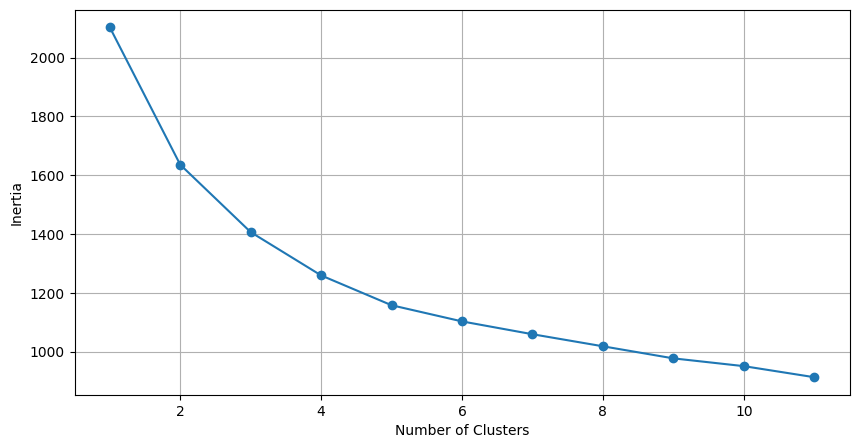

In [ ]:
optimise_k_means(df2_filtered, 12)

In [ ]:
kmeans= KMeans(n_clusters=3)

In [ ]:
kmeans.fit(df2_filtered)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
df2_filtered['kmeans_4']=kmeans.labels_

In [ ]:
df2_filtered

,Number of Pages,Month,classics,dystopian,literary,historical,lgbtqia+,fiction,magical realism,horror,speculative fiction,science fiction,romance,contemporary,crime,thriller,mystery,fantasy,young adult,sports,erotica,middle grade,graphic novel,nonfiction,biography,feminism,gender,memoir,health,psychology,science,music,almanacs,amputees,angels,architecture,art,modern,bibles,biography & autobiography,boardinghouses,body,mind & spirit,business & economics,butterflies,childrens stories,christmas cooking,civilization,clinical competence,comics & graphic novels,computers,cooking,crystals,detective and mystery stories,dogs,drama,easter,education,family & relationships,health & fitness,house & home,humor,language arts & disciplines,law,literary collections,literary criticism,mathematics,medical,nature,performing arts,pets,philosophy,poetry,political science,reference,religion,self-help,social science,technology & engineering,kmeans_4
0,-0.077593,-0.575156,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.443520,0.607333,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.902687,-0.575156,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,-0.256725,1.789823,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.058114,0.016088,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,-0.164445,-1.166401,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,-0.245868,-0.279534,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.248103,1.789823,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1.160049,-1.166401,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,-1.119817,-1.462024,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

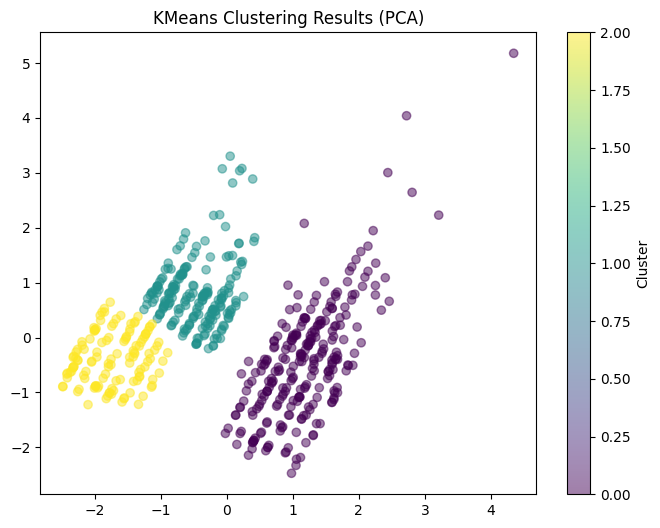

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df2_filtered)

# Plot the clustered data points
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5)
plt.title('KMeans Clustering Results (PCA)')
plt.colorbar(label='Cluster')
plt.show()